In [1]:
from sklearn.covariance import EllipticEnvelope
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io 
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Minimun covariance determinant

**Description: X = Multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)**

In [2]:
mat = scipy.io.loadmat(os.path.join('wine','cover.mat'))
x_train = mat['X']
y_train = mat['y']
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [54]:
outmodel = EllipticEnvelope(random_state=145).fit(X_train)

Classification Report:
              precision    recall  f1-score   support

           0     0.9904    0.9047    0.9456     28318
           1     0.0139    0.1324    0.0251       287

    accuracy                         0.8970     28605
   macro avg     0.5021    0.5186    0.4854     28605
weighted avg     0.9806    0.8970    0.9364     28605



Text(33.0, 0.5, 'True Labels')

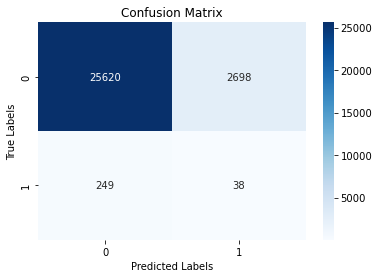

In [55]:
y_pred = outmodel.predict(X_test)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
print('Classification Report:')

print(classification_report(y_test, y_pred, digits=4))       
cm_det = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


# IsolationForest

In [8]:
from sklearn.ensemble import IsolationForest

In [11]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1),max_features=1.0, n_jobs=2)
model.fit(X_train)

IsolationForest(contamination=0.1, n_estimators=150, n_jobs=2)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28318
           1       0.08      0.73      0.14       287

    accuracy                           0.91     28605
   macro avg       0.54      0.82      0.54     28605
weighted avg       0.99      0.91      0.94     28605



Text(33.0, 0.5, 'True Labels')

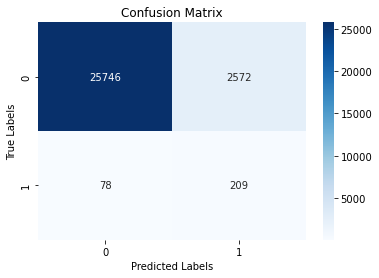

In [12]:
y_predI = model.predict(X_test)
y_predI[y_predI==1]=0
y_predI[y_predI==-1]=1
print('Classification Report:')

print(classification_report(y_test, y_predI))       
cm_det = confusion_matrix(y_test, y_predI)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# PyOD

In [3]:
from pyod.models.ecod import ECOD
clf = ECOD(contamination=0.1)
clf.fit(X_train)

ECOD(contamination=0.1, n_jobs=1)

In [102]:
y_test_pred = clf.predict(X_test) 

In [103]:
sum(y_test_pred==1)

2784

In [104]:
sum(y_test==1)

array([287])

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28318
           1       0.07      0.71      0.13       287

    accuracy                           0.91     28605
   macro avg       0.53      0.81      0.54     28605
weighted avg       0.99      0.91      0.94     28605



Text(33.0, 0.5, 'True Labels')

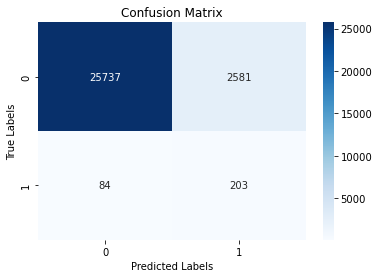

In [105]:
print('Classification Report:')

print(classification_report(y_test, y_test_pred))       
cm_det = confusion_matrix(y_test,y_test_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


# Downsample

In [106]:
from sklearn.utils import resample

In [27]:
f= pd.DataFrame(mat['X'])
f['y'] = mat['y']
norm = f[f['y']==0]
ano = f[f['y']==1]
norm_down = resample(norm,
             replace=True,
             n_samples=len(ano),
             random_state=42)
data_downsampled = pd.concat([norm_down, ano])

y= data_downsampled['y']
x=data_downsampled.drop(columns=['y'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
X_train = np.array(X_train)
X_tes = np.array(X_test)
y_train = np.array(y_train)
y_tes = np.array(y_test)


In [29]:
outmodel1 = EllipticEnvelope(random_state=1245).fit(X_train)
model2=IsolationForest(n_estimators=70, max_samples='auto', contamination=float(0.1),max_features=1.0, n_jobs=2)
model2.fit(X_train)
model3= ECOD()
model3.fit(X_train)

ECOD(contamination=0.1, n_jobs=1)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.90      0.64       411
           1       0.46      0.08      0.14       414

    accuracy                           0.49       825
   macro avg       0.48      0.49      0.39       825
weighted avg       0.48      0.49      0.39       825



Text(33.0, 0.5, 'True Labels')

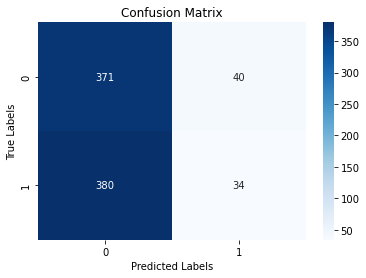

In [31]:
y_pred = outmodel1.predict(X_test)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print('Classification Report:')

print(classification_report(y_test, y_pred))       
cm_det = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.88      0.62       411
           1       0.37      0.07      0.12       414

    accuracy                           0.47       825
   macro avg       0.43      0.47      0.37       825
weighted avg       0.43      0.47      0.37       825



Text(33.0, 0.5, 'True Labels')

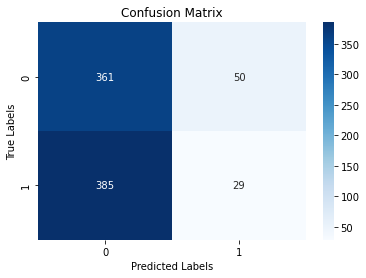

In [34]:
y_pred = model2.predict(X_test)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print('Classification Report:')

print(classification_report(y_test, y_pred))       
cm_det = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [17]:
from pyod.models.suod import SUOD

from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# initialized a group of outlier detectors for acceleration
detector_list = [EllipticEnvelope(random_state=1245), 
                 IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1),max_features=1.0)]

# decide the number of parallel process, and the combination method
# then clf can be used as any outlier detection model
clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
           verbose=False)

In [18]:
clf.fit(X_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  1.0min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


NotFittedError: This EllipticEnvelope instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28318
           1       0.00      0.00      0.00       287

    accuracy                           0.99     28605
   macro avg       0.49      0.50      0.50     28605
weighted avg       0.98      0.99      0.98     28605



[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.5s finished


Text(33.0, 0.5, 'True Labels')

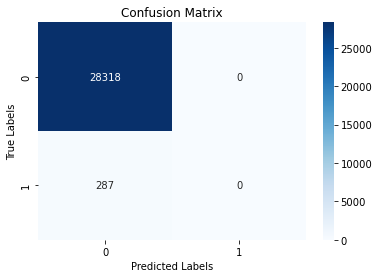

In [6]:
y_pred = clf.predict(X_test)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

print('Classification Report:')

print(classification_report(y_test, y_pred))       
cm_det = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')